### **1. Prepare the well-known dataset for hand-written digits (MNIST) and flowers (IRIS)**

In [ ]:
import sklearn.datasets as dataset
mnist = dataset.fetch_openml('mnist_784')



> A. Randomly select 10,000 images for dataset. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mnist_data = mnist.data
mnist_target = mnist.target

# mnist dataset에서 원하는 수 추출
index4 = np.array((mnist_target == '4').nonzero()).squeeze()
index7 = np.array((mnist_target == '7').nonzero()).squeeze()
index8 = np.array((mnist_target == '8').nonzero()).squeeze()

binary_index = np.concatenate((index4,index7))
ternary_index = np.concatenate((index4,index7,index8))



> > Binary





shuffle index : [ 1743  7501 11895 ...  2472 13359  5365]
mnist target :  4


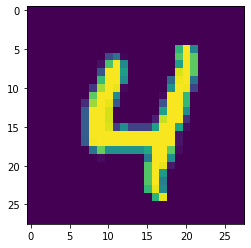

In [ ]:
binary_ds = mnist_data[binary_index]
binary_target = mnist_target[binary_index]

# Image shuffle
s = np.arange(binary_ds.shape[0])
np.random.shuffle(s)
print("shuffle index :",s)
binary_ds = binary_ds[s]
binary_target = binary_target[s]

# Select 10,000 images
binary_ds = binary_ds[:10000]
binary_target = binary_target[:10000]
a = binary_ds[0].reshape((28,28))
print('mnist target : ',binary_target[0])
plt.imshow(a)

> > Ternary

shuffle index : [ 8860  8394 15307 ... 19198  1986  2592]
mnist target :  7


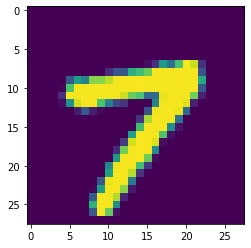

In [ ]:
ternary_ds = mnist_data[ternary_index]
ternary_target = mnist_target[ternary_index]

# Image shuffle
s = np.arange(ternary_ds.shape[0])
np.random.shuffle(s)
print("shuffle index :",s)
ternary_ds = ternary_ds[s]
ternary_target = ternary_target[s]

# Select 10,000 images
ternary_ds = ternary_ds[:10000]
ternary_target = ternary_target[:10000]
a = ternary_ds[0].reshape((28,28))
print('mnist target : ',ternary_target[0])
plt.imshow(a)



> B. Separate the dataset into training and test set. 





> > Binary

In [ ]:
train_ds = binary_ds[:7500]
test_ds = binary_ds[7500:]
train_y = binary_target[:7500]
test_y = binary_target[7500:]
print('train shape :', train_ds.shape)
print('test shape :', test_ds.shape)

train shape : (7500, 784)
test shape : (2500, 784)


> > Ternary

In [ ]:
train3_ds = ternary_ds[:7500]
test3_ds = ternary_ds[7500:]
train3_y = ternary_target[:7500]
test3_y = ternary_target[7500:]
print('train shape :', train3_ds.shape)
print('test shape :', test3_ds.shape)

train shape : (7500, 784)
test shape : (2500, 784)




> C. Train the data using SVM library



> > Binary

In [ ]:
from sklearn import svm
from sklearn import metrics
model = svm.SVC(kernel='linear',C=1) # SVM 라이브러리
def b_train(model,train_ds,train_y):
    model.fit(train_ds,train_y)
    y_pred = model.predict(train_ds) # svm이 각 train_ds를 보고 예측한 결과

    return metrics.classification_report(train_y, y_pred) # 정답(target)과 비교
output = b_train(model,train_ds,train_y)
print(output)

['4' '7' '7' ... '4' '4' '4']
              precision    recall  f1-score   support

           4       1.00      1.00      1.00      3681
           7       1.00      1.00      1.00      3819

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



> > Ternary

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model2 = svm.SVC(kernel='linear',C=1) # SVM 라이브러리
def t_train(model,train_ds,train_y):
    model.fit(train_ds,train_y)
    y_pred = model.predict(train_ds) # svm이 각 train_ds를 보고 예측한 결과
    return metrics.classification_report(train_y, y_pred) # 정답(target)과 비교
output = t_train(model2,train3_ds,train3_y)
print(output)

              precision    recall  f1-score   support

           4       1.00      1.00      1.00      2423
           7       1.00      1.00      1.00      2634
           8       1.00      1.00      1.00      2443

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500





> D. Test the trained parameters using test set.



> > Binary

In [ ]:
def b_test(model,test_ds,test_y):
    model.fit(test_ds,test_y)
    test_y_pred = model.predict(test_ds)
    return metrics.classification_report(test_y,test_y_pred)
test_output = b_test(model,test_ds,test_y)
print(test_output)

              precision    recall  f1-score   support

           4       1.00      1.00      1.00      1184
           7       1.00      1.00      1.00      1316

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



> > Ternary

In [ ]:
def t_test(model,test_ds,test_y):
    model.fit(test_ds,test_y)
    test_y_pred = model.predict(test_ds)
    return metrics.classification_report(test_y,test_y_pred)
test_output = t_test(model2,test3_ds,test3_y)
print(test_output)

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       793
           7       1.00      1.00      1.00       892
           8       1.00      1.00      1.00       815

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500





> E. Repeat step B-D using k-fold (k=4) cross-validation method.



> > Binary

In [ ]:
k1,k2,k3,k4 = binary_ds[:2500],binary_ds[2500:5000],binary_ds[5000:7500],binary_ds[7500:]
k1_y,k2_y,k3_y,k4_y = binary_target[:2500],binary_target[2500:5000],binary_target[5000:7500],binary_target[7500:]

print('*'*80)
# k = 1
train_ds = np.concatenate((k1,k2,k3))
test_ds = k4
train_y = np.concatenate((k1_y,k2_y,k3_y))
test_y = k4_y
k1_train = b_train(model,train_ds,train_y)
k1_test = b_test(model,test_ds,test_y)
print('K1 Train Accuracy : \n',k1_train)
print('K1 Test Accuracy : \n',k1_test)
print('*'*80)

# k = 2
train_ds = np.concatenate((k1,k2,k4))
test_ds = k3
train_y = np.concatenate((k1_y,k2_y,k4_y))
test_y = k3_y
k2_train = b_train(model,train_ds,train_y)
k2_test = b_test(model,test_ds, test_y)
print('K2 Train Accuracy : \n',k2_train)
print('K2 Test Accuracy : \n',k2_test)
print('*'*80)

# k = 3
train_ds = np.concatenate((k1,k3,k4))
test_ds = k2
train_y = np.concatenate((k1_y,k3_y,k4_y))
test_y = k2_y
k3_train = b_train(model,train_ds,train_y)
k3_test = b_test(model,test_ds, test_y)
print('K3 Train Accuracy : \n',k3_train)
print('K3 Test Accuracy : \n',k3_test)
print('*'*80)

# k = 4
train_ds = np.concatenate((k2,k3,k4))
test_ds = k1
train_y = np.concatenate((k2_y,k3_y,k4_y))
test_y = k1_y
k4_train = b_train(model,train_ds,train_y)
k4_test = b_test(model,test_ds, test_y)
print('K4 Train Accuracy : \n',k4_train)
print('K4 Test Accuracy : \n',k4_test)
print('*'*80)

********************************************************************************
K1 Train Accuracy : 
               precision    recall  f1-score   support

           4       1.00      1.00      1.00      3661
           7       1.00      1.00      1.00      3839

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

K1 Test Accuracy : 
               precision    recall  f1-score   support

           4       1.00      1.00      1.00      1178
           7       1.00      1.00      1.00      1322

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

********************************************************************************
K2 Train Accuracy : 
               precision    recall  f1-score   support

           4       1.00      1.00      1.00      3610
          

> > Ternary

In [ ]:
tk1,tk2,tk3,tk4 = ternary_ds[:2500],ternary_ds[2500:5000],ternary_ds[5000:7500],ternary_ds[7500:]
tk1_y,tk2_y,tk3_y,tk4_y = ternary_target[:2500],ternary_target[2500:5000],ternary_target[5000:7500],ternary_target[7500:]

print('*'*80)
# k = 1
train3_ds = np.concatenate((tk1,tk2,tk3))
test3_ds = tk4
train3_y = np.concatenate((tk1_y,tk2_y,tk3_y))
test3_y = tk4_y
tk1_train = t_train(model2,train3_ds,train3_y)
tk1_test = t_test(model2,test3_ds,test3_y)
print('tK1 Train Accuracy : \n',tk1_train)
print('tK1 Test Accuracy : \n',tk1_test)
print('*'*80)

# k = 2
train3_ds = np.concatenate((tk1,tk2,tk4))
test3_ds = tk3
train3_y = np.concatenate((tk1_y,tk2_y,tk4_y))
test3_y = tk3_y
tk2_train = t_train(model2,train3_ds,train3_y)
tk2_test = t_test(model2,test3_ds, test3_y)
print('tK2 Train Accuracy : \n',tk2_train)
print('tK2 Test Accuracy : \n',tk2_test)
print('*'*80)

# k = 3
train3_ds = np.concatenate((tk1,tk3,tk4))
test3_ds = tk2
train3_y = np.concatenate((tk1_y,tk3_y,tk4_y))
test3_y = tk2_y
tk3_train = t_train(model2,train3_ds,train3_y)
tk3_test = t_test(model2,test3_ds, test3_y)
print('tK3 Train Accuracy : \n',tk3_train)
print('tK3 Test Accuracy : \n',tk3_test)
print('*'*80)

# k = 4
train3_ds = np.concatenate((tk2,tk3,tk4))
test3_ds = tk1
train3_y = np.concatenate((tk2_y,tk3_y,tk4_y))
test3_y = tk1_y
tk4_train = t_train(model2,train3_ds,train3_y)
tk4_test = t_test(model2,test3_ds, test3_y)
print('tK4 Train Accuracy : \n',tk4_train)
print('tK4 Test Accuracy : \n',tk4_test)
print('*'*80)

********************************************************************************
tK1 Train Accuracy : 
               precision    recall  f1-score   support

           4       1.00      1.00      1.00      2430
           7       1.00      1.00      1.00      2631
           8       1.00      1.00      1.00      2439

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

tK1 Test Accuracy : 
               precision    recall  f1-score   support

           4       1.00      1.00      1.00       786
           7       1.00      1.00      1.00       895
           8       1.00      1.00      1.00       819

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

********************************************************************************
tK2 Train Accuracy : 
         